# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
# for SVR both X and y has to be feature scaled since svr doesn't use equation/ coeffs as in linear regression. except when already all columns are in the same range, dummy variables are used etc.
y = y.reshape(-1, 1)
print(y)
# y also has to be 2D array to input in the scaler.

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [10]:
#radial basis kernel
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [11]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

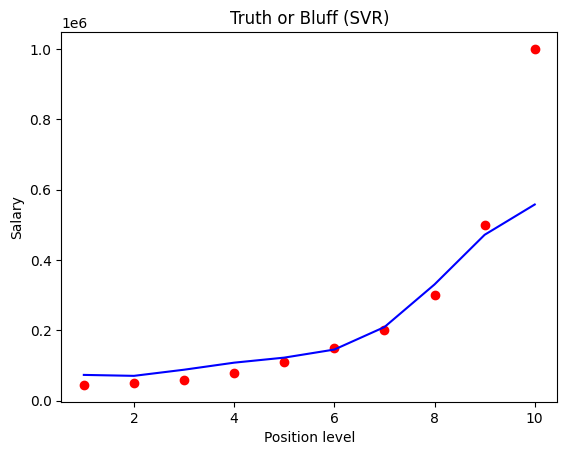

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color= 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue' )
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

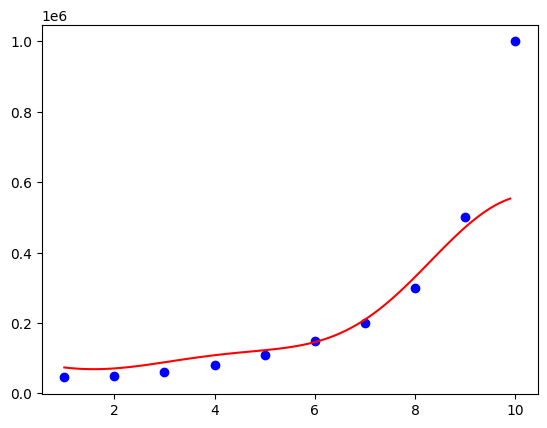

In [20]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'red')
plt.xlabel = 'Position level'
plt.ylabel = 'Salary'
plt.show()